In [2]:
import pandas as pd
import plotnine as p9
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx

import Data.cs_aarhus.util_data as ud


# Force figure and saved figure backgrounds to white
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['savefig.facecolor'] = 'white'


In [3]:
results_df = pd.read_csv('Data/cs_aarhus/cs_analysis_results.csv')

In [4]:
results_df["model"].unique(), results_df.shape

(array(['true_net', 'agg_or', 'agg_and', 'two_stage', 'MWG'], dtype=object),
 (12010, 14))

In [5]:
results_df = results_df[results_df["model"] != "model"]

In [ ]:

results_df["bias"] = pd.to_numeric(results_df["bias"], errors="coerce")
results_df["mean"] = pd.to_numeric(results_df["mean"], errors="coerce")
results_df["std"] = pd.to_numeric(results_df["std"], errors="coerce")
results_df["RMSE_rel"] = pd.to_numeric(results_df["RMSE_rel"], errors="coerce")
results_df["MAPE"] = pd.to_numeric(results_df["MAPE"], errors="coerce")
# results_df["covering"] = np.bool(results_df["covering"])


In [8]:
results_df.head(5)

,idx,layer,model,estimand,mean,median,TRUE,bias,std,RMSE_rel,MAPE,covering,mean_ind_cover,w_dist
0,0,lunch,true_net,stoch,2.26830,2.16979,2.50467,-0.23636,0.20496,0.12491,0.09034,True,1.00000,1.084753
1,0,lunch,true_net,gate,5.69650,5.40408,6.29180,-0.59530,0.51534,0.12514,0.09045,True,1.00000,1.084753
2,0,lunch,agg_or,stoch,1.99342,1.85952,2.50467,-0.51125,0.35594,0.24872,0.24439,True,0.52459,4.131435
3,0,lunch,agg_or,gate,4.99921,4.65106,6.29180,-1.29259,0.89625,0.24999,0.24427,True,0.54098,4.131435
4,0,lunch,agg_and,stoch,1.34285,1.34143,2.50467,-1.16181,0.17565,0.46913,0.42847,False,0.09836,5.101647


In [10]:
model_rename = {
    "true_net": "True",
    "MWG": "BG",
    "two_stage": "Two-stage",
    "agg_or": "OR",
    "agg_and": "AND",
}

results_df["model"] = results_df["model"].replace(model_rename)
results_df["model"] = pd.Categorical(results_df["model"], categories=model_rename.values(), ordered=True)


layer_rename = {
    "facebook": "Facebook",
    "leisure": "Leisure",
    "lunch": "Lunch",
    "work": "Work",
}

results_df["layer"] = results_df["layer"].replace(layer_rename)
results_df["layer"] = pd.Categorical(results_df["layer"], categories=layer_rename.values(), ordered=True)


summary_df = (
    results_df[results_df["estimand"] == "gate"]
    .groupby(["layer", "model"])
    .agg(
    
      
        mape = ("MAPE", "mean"),
        mape_std = ("MAPE", "std"),
        mape_low = ("MAPE", lambda x: np.mean(x) - np.std(x)),
        mape_high = ("MAPE", lambda x: np.mean(x) + np.std(x)),

        rmse_rel = ("RMSE_rel", "mean"),
        rmse_rel_low = ("RMSE_rel", lambda x: np.mean(x) - np.std(x)),
        rmse_rel_high = ("RMSE_rel", lambda x: np.mean(x) + np.std(x)),
        
        mean = ("mean", "mean"),
        std = ("std", "mean"),

        coverage = ("covering", "mean"),
        # coverage = ("covering", lambda x: np.mean(x == "True")),

        bias = ("bias", "mean"),
        bias_low = ("bias", lambda x: np.percentile(x, 2.5)),
        bias_high = ("bias", lambda x: np.percentile(x, 97.5)),
        )
    .reset_index()
)

summary_df


/var/folders/57/pk6tp2hs4fn90n5yyf8dd0z40000gn/T/ipykernel_7313/3726184399.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


,layer,model,mape,mape_std,mape_low,mape_high,rmse_rel,rmse_rel_low,rmse_rel_high,mean,std,coverage,bias,bias_low,bias_high
0,Facebook,True,0.069822,0.044543,0.025354,0.114291,0.082402,0.057685,0.107119,5.538535,0.345019,0.953333,-0.038514,-0.608063,0.671359
1,Facebook,BG,0.131965,0.059300,0.072765,0.191166,0.117385,0.076246,0.158523,5.797025,0.359537,0.923333,0.219975,-0.500123,1.196191
2,Facebook,Two-stage,0.396683,0.098727,0.298120,0.495245,0.239282,0.148292,0.330273,6.767689,1.158000,0.576667,1.190640,-0.312055,2.461936
3,Facebook,OR,0.782991,0.197753,0.585567,0.980415,0.437264,0.257453,0.617074,7.715034,1.003449,0.450000,2.137985,0.008004,4.990165
4,Facebook,AND,0.501015,0.092513,0.408656,0.593373,0.190275,0.110148,0.270402,4.993893,0.597263,0.716667,-0.583157,-2.050120,0.965691
5,Leisure,True,0.104390,0.080498,0.024027,0.184753,0.157448,0.084414,0.230482,3.912216,0.449025,0.933110,-0.178494,-1.396907,0.651222
6,Leisure,BG,0.157453,0.095430,0.062183,0.252723,0.215178,0.119298,0.311059,4.039167,0.475257,0.933110,-0.051542,-1.782901,1.055099
7,Leisure,Two-stage,0.186662,0.059026,0.127736,0.245589,0.207658,0.138806,0.276511,3.840135,0.741878,0.913043,-0.250575,-1.457359,0.995579
8,Leisure,OR,0.419377,0.229061,0.190699,0.648054,0.461917,0.244229,0.679606,4.982675,1.274808,0.899666,0.891965,-1.454711,3.944213
9,Leisure,AND,0.233055,0.061143,0.172014,0.294096,0.236665,0.138219,0.335111,3.301124,0.453034,0.545151,-0.789586,-1.897579,0.218290


In [11]:
# Make latex table (of MAPE values (mean (std)))

summary_df['formatted_val'] = summary_df.apply(
    lambda x: f"{x['mape']:.3f} ({x['mape_std']:.3f})", 
    axis=1
)

pivot_df = summary_df.pivot(
    index= 'model', 
    columns='layer', 
    values='formatted_val'
)

latex_table = pivot_df.to_latex(
    multirow=True,  # Groups the 'estimand' column visually
    escape=True,    # Escapes special characters if necessary
    column_format='ll' + 'c'*len(pivot_df.columns), # Aligns text columns left, data center
    caption="MAPE (std) values by layer and model",
    label="tab:model_performance"
)
latex_table = latex_table.replace(r"\multirow[t]", r"\multirow")

print(latex_table)

\begin{table}
\caption{MAPE (std) values by layer and model}
\label{tab:model_performance}
\begin{tabular}{llcccc}
\toprule
layer & Facebook & Leisure & Lunch & Work \\
model &  &  &  &  \\
\midrule
True & 0.070 (0.045) & 0.104 (0.080) & 0.055 (0.041) & 0.040 (0.024) \\
BG & 0.132 (0.059) & 0.157 (0.095) & 0.111 (0.049) & 0.096 (0.036) \\
Two-stage & 0.397 (0.099) & 0.187 (0.059) & 0.169 (0.044) & 0.287 (0.073) \\
OR & 0.783 (0.198) & 0.419 (0.229) & 0.272 (0.057) & 0.320 (0.065) \\
AND & 0.501 (0.093) & 0.233 (0.061) & 0.425 (0.072) & 0.324 (0.055) \\
\bottomrule
\end{tabular}
\end{table}



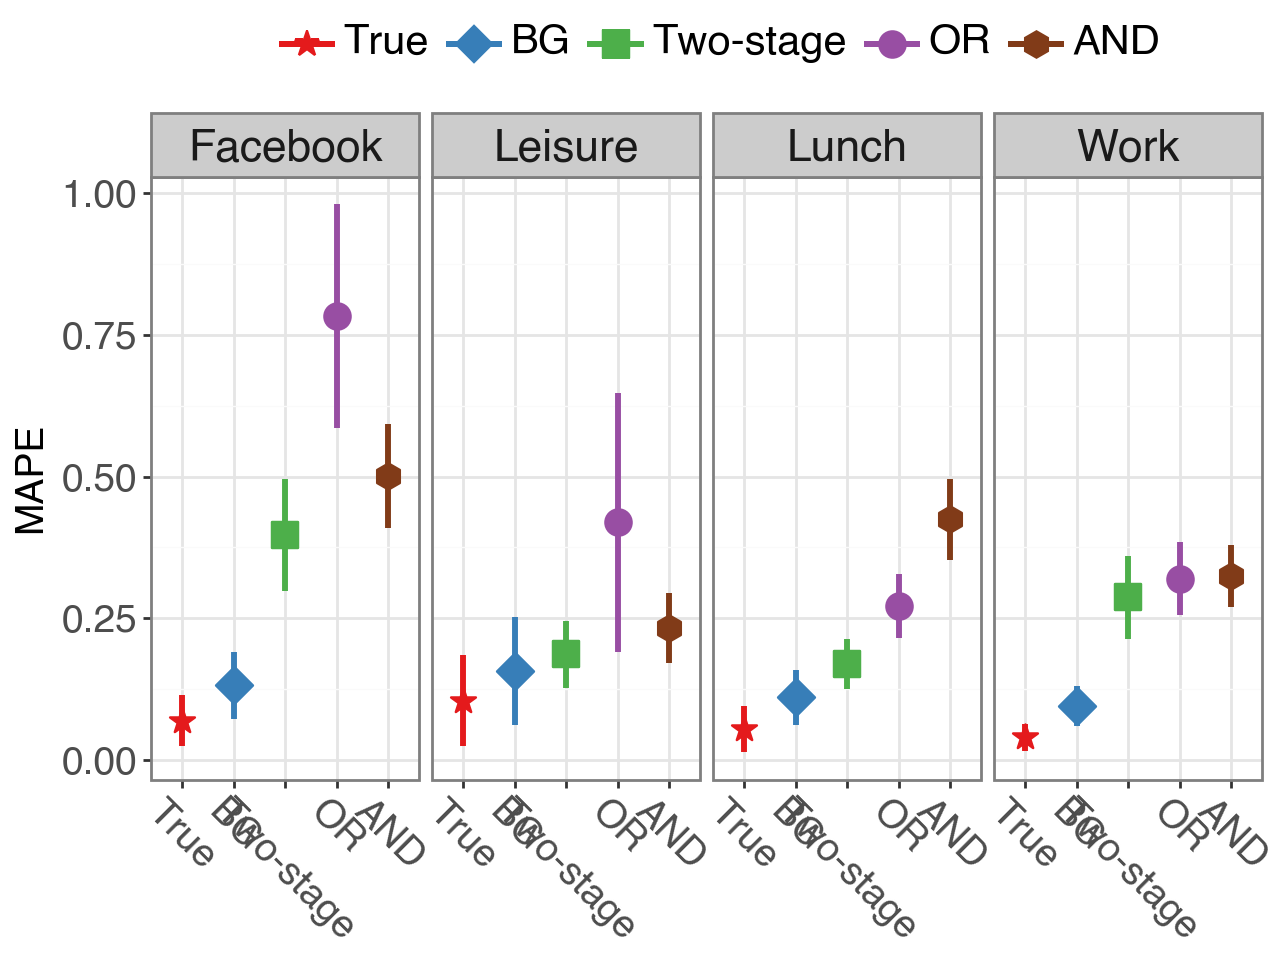

In [13]:
# MAPE plot

custom_palette = {
    "True": "#E41A1C",   # Red
    "BG": "#377EB8",        # Green
    "Two-stage": "#4DAF4A",  # Green
    # "BG": "#4DAF4A",        # Green
    "OR": "#984EA3",     # Purple
    "AND": "#813b18",   # Brown
}

custom_shapes = {
    "True": '*',      # star
    "BG": 'D',        # diamond
    "Two-stage": 's',  # square
    "OR": 'o',  # hexagon
    "AND": 'h'       # circle
}


plot = (
    p9.ggplot(summary_df,
               p9.aes(x="model", 
                                 y="mape", 
                                #  y="rmse_rel", 
                                 color="model",
                                 shape="model"))
    + p9.geom_pointrange(
        p9.aes(ymin="mape_low", ymax="mape_high"),
        # p9.aes(ymin="rmse_rel_low", ymax="rmse_rel_high"),
        size=1.2  
    )
    # + p9.theme_minimal()
    + p9.theme_bw()
    + p9.facet_wrap("layer", scales="fixed", ncol=4)
    + p9.labs(y="MAPE", x="", color="", shape="")

    + p9.scale_color_manual(values=custom_palette)
    + p9.scale_shape_manual(values=custom_shapes)
    + p9.theme(
        legend_text=p9.element_text(size=15),
        legend_key_size=20,
        axis_title_y=p9.element_text(size=14,),
        axis_text_x=p9.element_text(size=14, angle=-45),
        axis_text_y=p9.element_text(size=14),
        strip_text=p9.element_text(size=16, weight='bold'), 
        legend_position="top", 
    )
)

plot.show()

# plot.save("Data/cs_aarhus/figs/cs_relative_error.png", dpi=300, height=4, width=6,)


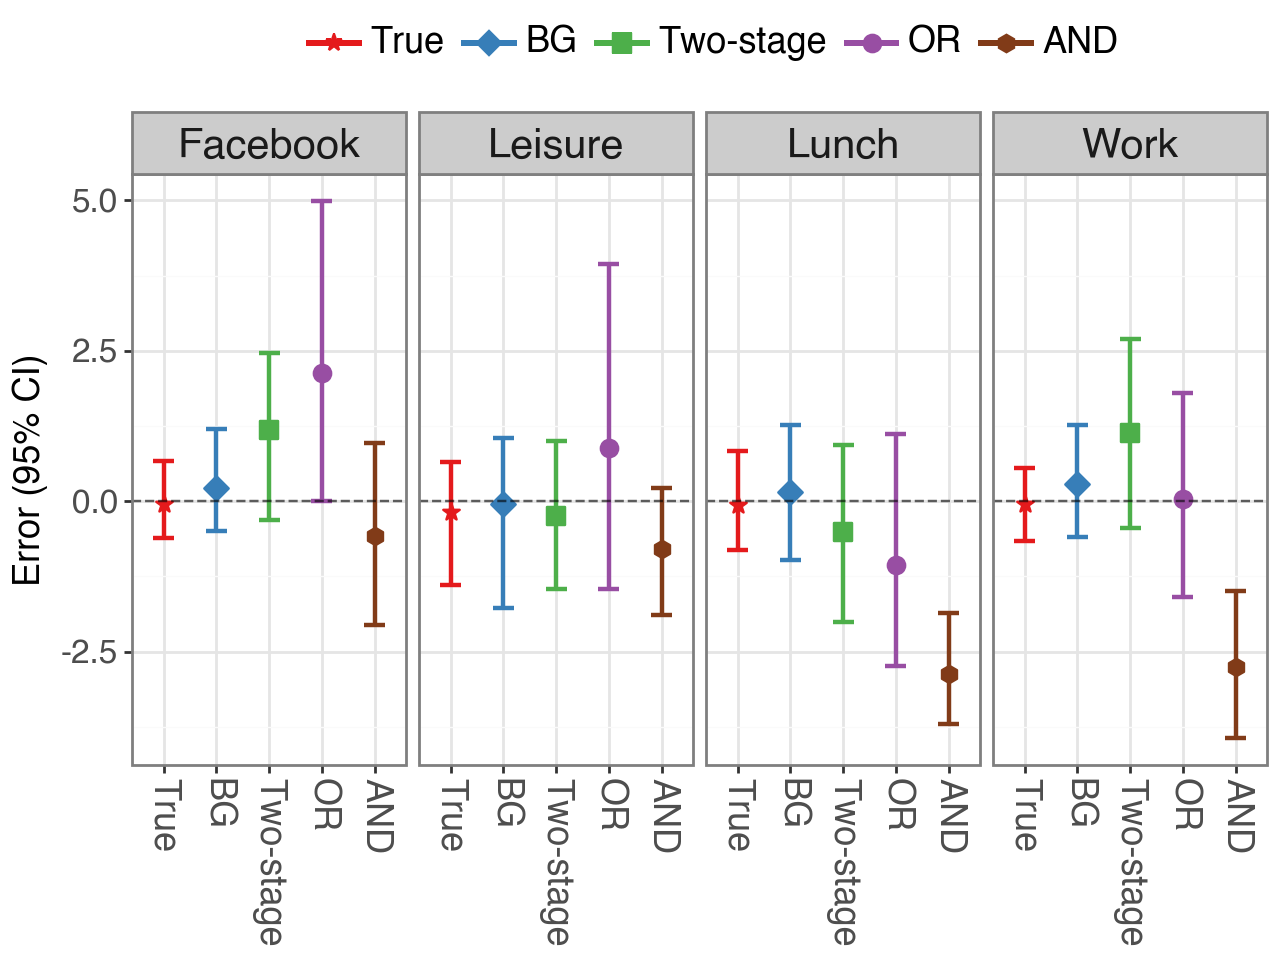

/Users/barwein/code/pystat/.venv/lib/python3.13/site-packages/plotnine/ggplot.py:623: PlotnineWarning: Saving 6.5 x 4 in image.
/Users/barwein/code/pystat/.venv/lib/python3.13/site-packages/plotnine/ggplot.py:624: PlotnineWarning: Filename: Data/cs_aarhus/figs/cs_bias_ci.png


In [14]:
# Bias CI plot

ci_plot = (
    p9.ggplot(summary_df, 
                    p9.aes(x="model", 
                            y="bias", 
                            group="model",
                            color="model",
                            shape="model"))

    + p9.geom_errorbar(
        p9.aes(ymin="bias_low", ymax="bias_high"),
        size=0.9, width=0.4  
    )
    + p9.geom_point(size=3,)
    + p9.geom_hline(yintercept=0.0, linetype="dashed", color="black", alpha=0.6)
    # + p9.theme_minimal()
    + p9.theme_bw()
    + p9.facet_wrap('layer', scales="fixed", ncol=4)  
    + p9.labs(y="Error (95% CI)", x="", color="", shape="")
    + p9.scale_color_manual(values=custom_palette)
    + p9.scale_shape_manual(values=custom_shapes)

    + p9.theme(
        legend_text=p9.element_text(size=13),
        legend_key_size=20,
        axis_title_y=p9.element_text(size=13,),
        axis_text_x=p9.element_text(size=13, angle=-90),
        axis_text_y=p9.element_text(size=12),
        strip_text=p9.element_text(size=15, weight='bold',), 
        legend_position="top", 
    )
)

ci_plot.show()

ci_plot.save("Data/cs_aarhus/figs/cs_bias_ci.png", dpi=300, height=4, width=6.5,)


In [16]:
# Make latex table (of MAPE values (mean (std)))

summary_df['coverage_fmt'] = summary_df.apply(
    lambda x: f"{x['coverage']:.3f}", 
    axis=1
)

pivot_df_c = summary_df.pivot(
    index= 'model', 
    columns='layer', 
    values='coverage_fmt'
)

latex_table_c = pivot_df_c.to_latex(
    multirow=True,  # Groups the 'estimand' column visually
    escape=True,    # Escapes special characters if necessary
    column_format='ll' + 'c'*len(pivot_df_c.columns), # Aligns text columns left, data center
    caption="Empirical coverage by layer and model",
    label="tab:model_performance"
)
latex_table_c = latex_table_c.replace(r"\multirow[t]", r"\multirow")

print(latex_table_c)

\begin{table}
\caption{Empirical coverage by layer and model}
\label{tab:model_performance}
\begin{tabular}{llcccc}
\toprule
layer & Facebook & Leisure & Lunch & Work \\
model &  &  &  &  \\
\midrule
True & 0.953 & 0.933 & 0.957 & 0.960 \\
BG & 0.923 & 0.933 & 0.947 & 0.917 \\
Two-stage & 0.577 & 0.913 & 0.853 & 0.854 \\
OR & 0.450 & 0.900 & 0.607 & 0.964 \\
AND & 0.717 & 0.545 & 0.000 & 0.003 \\
\bottomrule
\end{tabular}
\end{table}



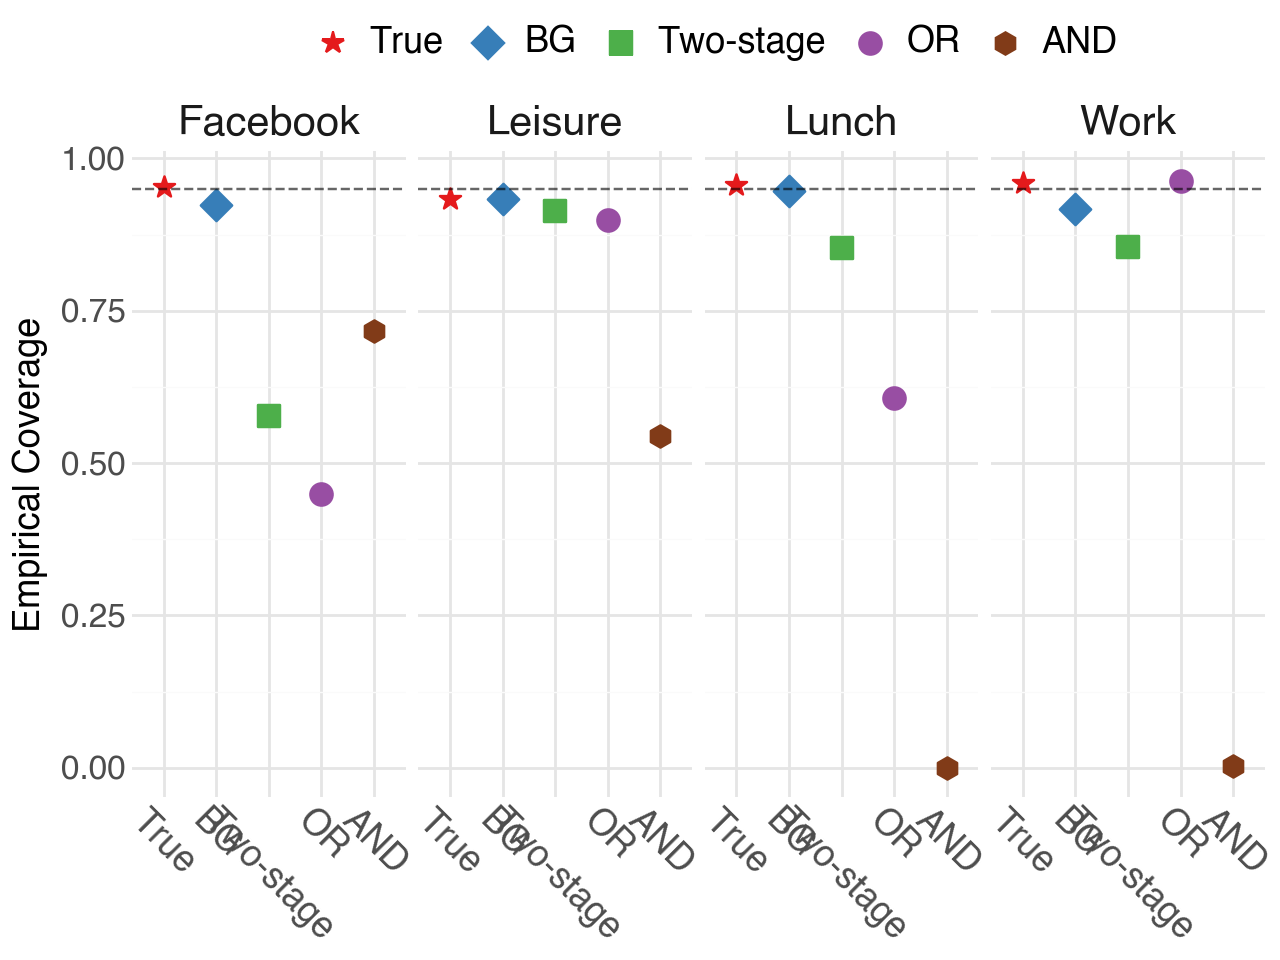

In [14]:

cover_plot = (
    p9.ggplot(summary_df, 
                    p9.aes(x="model", 
                            y="coverage", 
                            group="model",
                            color="model",
                            shape = "model"))

    + p9.geom_point(size=4, 
                 position = p9.position_dodge(width=0.7))
    + p9.geom_hline(yintercept=0.95, linetype="dashed", color="black", alpha=0.6)
    + p9.theme_minimal()
    + p9.facet_wrap('layer', scales="fixed", ncol=4)
    + p9.labs(y="Empirical Coverage", x="", color="", shape="")
    # + p9.scale_y_continuous(breaks=np.arange(-1.5, 1 + 0.01, 0.5))
    + p9.scale_color_manual(values=custom_palette)
    + p9.scale_shape_manual(values=custom_shapes)

    + p9.theme(
        legend_text=p9.element_text(size=13),
        legend_key_size=20,
        axis_title_y=p9.element_text(size=13,),
        axis_text_x=p9.element_text(size=13, angle=-45),
        axis_text_y=p9.element_text(size=12),
        strip_text=p9.element_text(size=15, weight='bold',), 
        legend_position="top", 
    )


)

cover_plot.show()

# ci_plot.save("Data/cs_aarhus/figs/cs_bias_ci.png", dpi=300, height=4, width=6.5,)


In [3]:
#  Read network data

network_data = ud.network_data()

print(network_data.keys())
print(network_data["adj_mat_dict"].keys(), network_data["adj_mat_dict"]['facebook'].shape)


dict_keys(['adj_mat_dict', 'triu_dict'])
dict_keys(['lunch', 'facebook', 'leisure', 'work']) (61, 61)


In [4]:
# print statistics of the networks

layers = list(network_data["adj_mat_dict"].keys())

for layer in layers:
    print("-" * 40)
    print(f"Layer : {layer}")
    print("n_edge:", network_data["adj_mat_dict"][layer].sum()/2)
    deg = network_data["adj_mat_dict"][layer].sum(axis=1)
    avg_deg = deg[deg > 0].mean()
    print("avg_deg (>0):", avg_deg)
    print("ave_deg:", network_data["adj_mat_dict"][layer].sum(axis=1).mean())
    n_not_connected = (deg == 0).sum()
    print("n_not_connected:", n_not_connected)
    print("-" * 40)

----------------------------------------
Layer : lunch
n_edge: 193.0
avg_deg (>0): 6.433334
ave_deg: 6.3278685
n_not_connected: 1
----------------------------------------
----------------------------------------
Layer : facebook
n_edge: 124.0
avg_deg (>0): 7.75
ave_deg: 4.0655737
n_not_connected: 29
----------------------------------------
----------------------------------------
Layer : leisure
n_edge: 88.0
avg_deg (>0): 3.7446806
ave_deg: 2.8852458
n_not_connected: 14
----------------------------------------
----------------------------------------
Layer : work
n_edge: 194.0
avg_deg (>0): 6.466667
ave_deg: 6.3606553
n_not_connected: 1
----------------------------------------


In [5]:
layers_of_interest = ["lunch", "work"]

for layer in layers:
    deg = network_data["adj_mat_dict"][layer].sum(axis=1)
    zero_deg_nodes = (deg == 0).nonzero()[0]
    print(f"Layer: {layer}")
    print("Indices of units with zero degree:", zero_deg_nodes)

Layer: lunch
Indices of units with zero degree: [59]
Layer: facebook
Indices of units with zero degree: [ 0  1  2  5  9 10 13 17 19 21 24 31 34 35 37 39 40 41 42 44 47 48 51 53
 54 56 58 59 60]
Layer: leisure
Indices of units with zero degree: [ 0  1  2  6 17 20 21 25 26 52 53 56 58 59]
Layer: work
Indices of units with zero degree: [0]


In [6]:
network_data["adj_mat_dict"]["lunch"].sum(axis=1)[0], network_data["adj_mat_dict"]["work"].sum(axis=1)[0]

(Array(2., dtype=float32), Array(0., dtype=float32))

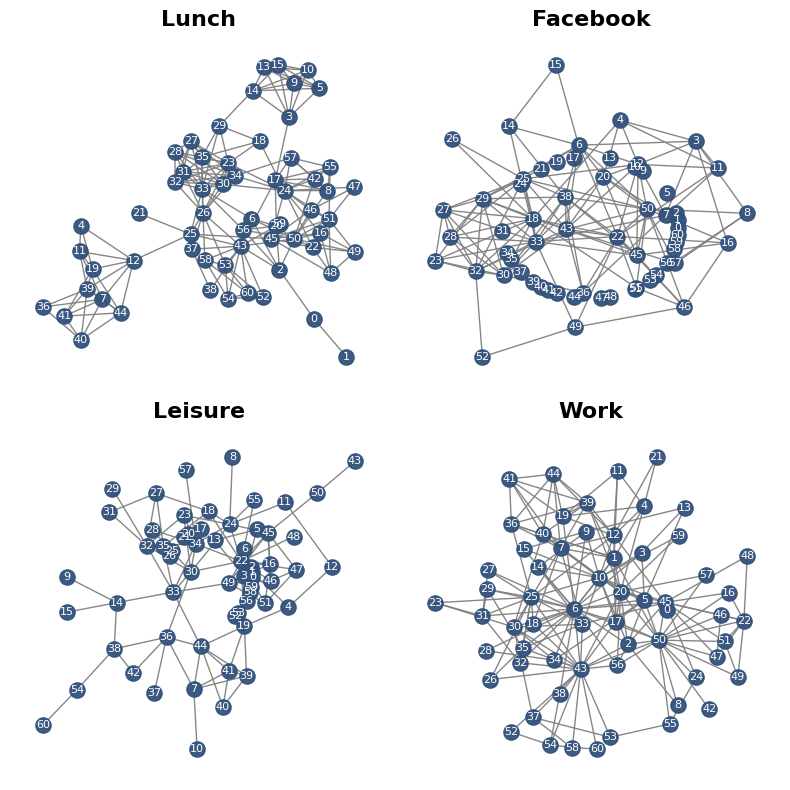

In [7]:

capitalized_layers = [layer.capitalize() for layer in layers]

# fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(14, 4))
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8))
axes = axes.flatten()
for i in range(4):
# for layer in networks_dict.keys():
    degs = network_data["adj_mat_dict"][layers[i]].sum(axis=1) + 1
    G = nx.from_numpy_array(np.array(network_data["adj_mat_dict"][layers[i]]))
    # pos = nx.circular_layout(G)
    pos = nx.kamada_kawai_layout(G)
    nx.draw_networkx(
        G,
        pos=pos,
        ax=axes[i],
        node_size=120,
        # node_size=degs*5 + 10,
        with_labels=False,
        edge_color='gray',
        # node_color = "#00008B",
        node_color = "#32527b",
        alpha=0.95
    )

    # Add node labels (Node IDs)
    labels = {node: str(node) for node in G.nodes()}  # Convert IDs to strings
    nx.draw_networkx_labels(G, pos, labels=labels, ax=axes[i], font_size=8, 
                            font_color="white")

    axes[i].set_title(f"{capitalized_layers[i]}", fontsize=16, color='black', fontweight='bold')
    axes[i].axis('off')
plt.tight_layout()

plt.savefig("Data/cs_aarhus/figs/cs_networks.png", dpi=200)

plt.show()

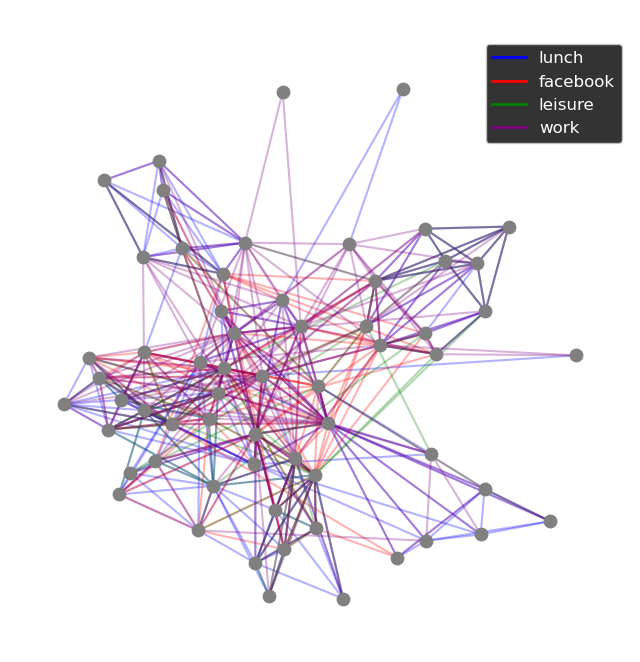

In [ ]:
# plot networks


# Define colors for each layer
layer_colors = {
    "lunch": "blue",
    "facebook": "red",
    "leisure": "green",
    "work": "purple"
}

# Create MultiGraph to allow multiple edges
G_combined = nx.MultiGraph()

# Add all edges from each layer, keeping duplicates
for layer in layers:
    G_layer = nx.from_numpy_array(np.array(network_data["adj_mat_dict"][layer]))
    for edge in G_layer.edges():
        G_combined.add_edge(edge[0], edge[1], layer=layer)

# Compute node positions using Fruchterman-Reingold layout (or Kamada-Kawai)
pos = nx.spring_layout(G_combined, seed=150)
# pos = nx.circular_layout(G_combined)

# Create figure
fig, ax = plt.subplots(figsize=(8, 8))

# Draw multi-edges separately for each layer
for layer in layers:
    edges = [(u, v) for u, v, d in G_combined.edges(data=True) if d["layer"] == layer]
    nx.draw_networkx_edges(G_combined, pos, edgelist=edges, edge_color=layer_colors[layer], alpha=0.3, width=1.5)

# Draw nodes
nx.draw_networkx_nodes(G_combined, pos, node_size=80, node_color="gray")

# Add legend
legend_labels = [plt.Line2D([0], [0], color=layer_colors[layer], lw=2, label=layer) for layer in layers]
plt.legend(handles=legend_labels, loc="upper right", fontsize=12)

ax.set_title("Multilayer Network (Multi-Edges Enabled)", fontsize=16, fontweight="bold")
ax.axis("off")

plt.show()